In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

### Flax PAV analysis

In [11]:
flax = pd.read_csv('../data/flax_matrix.tsv', sep='\t', index_col=0)

In [12]:
flax

,AT_vs_LM98,AT_vs_LUv2,LM98_vs_AT,LM98_vs_LUv2,LUv2_vs_AT,LUv2_vs_LM98
Lus10004456,1,1,1,1,1,1
Lus10015298,0,0,0,0,1,0
Lus10008347,1,0,1,1,1,1
Lus10001587,1,1,1,1,1,1
Lus10022434,1,1,1,1,1,0
...,...,...,...,...,...,...
Lus10007773,0,0,0,1,0,0
Lus10027107,0,0,0,1,0,0
Lus10040164,0,0,0,1,0,0
Lus10024314,0,0,0,1,0,0


In [13]:
column_sums = flax.sum()

print(column_sums)

AT_vs_LM98      26897
AT_vs_LUv2      18481
LM98_vs_AT      23763
LM98_vs_LUv2    23124
LUv2_vs_AT       8147
LUv2_vs_LM98    19786
dtype: int64


Всего генов, которые есть в референсной аннотации: 36436 

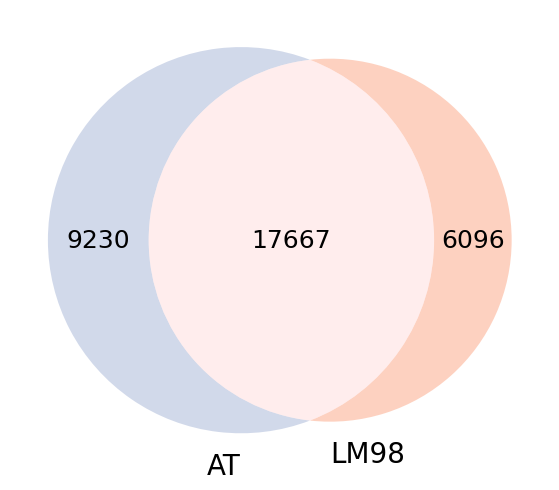

In [14]:
only_AT = flax[flax['AT_vs_LM98'] == 1].index
only_LM98 = flax[flax['LM98_vs_AT'] == 1].index

# Create sets for Venn diagram
# Genes in AT: those unique to AT plus those present in both (not unique to LM98)
# Genes in LM98: those unique to LM98 plus those present in both (not unique to AT)
set_AT = set(only_AT)
set_LM98 = set(only_LM98)

plt.figure(figsize=(8, 6))
venn = venn2([set_AT, set_LM98], set_labels=('AT', 'LM98'), set_colors=('#8da0cb', '#fc8d62'))

for text in venn.set_labels:
    if text: text.set_fontsize(20)  
for text in venn.subset_labels:
    if text: text.set_fontsize(18)  

#plt.savefig('../imgs/AT_vs_LM98_venn.png', dpi=300)
plt.show()

In [15]:
gene_list = []
for gene in only_AT:
    gene_list.append([gene, 'AT'])
for gene in only_LM98:
    gene_list.append([gene, 'LM98'])

gene_df = pd.DataFrame(gene_list, columns=['Gene', 'Presence'])

gene_df.to_csv('../data/flax_unique_genes_AT_LM98.csv', index=False)

print(f"Number of genes unique to AT: {len(only_AT)}")
print(f"Number of genes unique to LM98: {len(only_LM98)}")
print("\nFirst few rows of the unique genes table:")
print(gene_df.head())

Number of genes unique to AT: 26897
Number of genes unique to LM98: 23763

First few rows of the unique genes table:
          Gene Presence
0  Lus10004456       AT
1  Lus10008347       AT
2  Lus10001587       AT
3  Lus10022434       AT
4  Lus10008783       AT


In [16]:
genes_to_remove = gene_df.groupby('Gene')['Presence'].nunique()
genes_to_remove = genes_to_remove[genes_to_remove > 1].index

df_cleaned = gene_df[~gene_df['Gene'].isin(genes_to_remove)]

presence_counts = df_cleaned['Presence'].value_counts()

print(presence_counts)

Presence
AT      9230
LM98    6096
Name: count, dtype: int64
